# Monochrome (Black & white) plots in matplotlib

While writing my thesis, I was annoyed that there wasn't any good default options for outputting monochrome plots, as I didn't count on being able to expect that all prints would be in color. I therefore wanted plots that could work without any greyscales.

Right now this notebook describes how to setup and use line plots and bar plots. If you need other types of plots, do not hessitate to contact me, and I'll see what I can do.

In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
%pylab
%matplotlib inline
import numpy as np

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Line and marker styles
To get an idea of which line styles and markers are available we can inspect the lines and markers object

In [2]:
from matplotlib import lines, markers

In [3]:
lines.lineStyles.keys()

dict_keys(['', ' ', '--', ':', 'None', '-', '-.'])

In [4]:
markers.MarkerStyle.markers.keys()

dict_keys([0, 1, '*', 3, 4, 5, 6, 7, '8', 'None', 'd', 'h', 'D', 'v', None, '^', ',', '>', 'x', '<', 's', 'p', '', '2', '4', ' ', '_', 'o', '+', 'H', '|', 2, '1', '3', '.'])

## Cycle through line and marker styles
First we are going to create a [cycler](http://matplotlib.org/cycler/) object, that we will use to cycle through different styles. Using this object we can have a new line-style every time we plot a new line, and don't have to manually ensure that our lines are monochrome and different.

Cycler objects can be composed of several cycler objects and will iterate over all permutations of its components forever. Let us create a cycler object that cycles through several *line* and *marker* styles all with the color blac**k**.

In [5]:
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']) * cycler('marker', ['^',',', '.']))

# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
for i, item in zip(range(15), monochrome()):
    print(i, item)

number of items in monochrome: 12
0 {'color': 'k', 'linestyle': '-', 'marker': '^'}
1 {'color': 'k', 'linestyle': '-', 'marker': ','}
2 {'color': 'k', 'linestyle': '-', 'marker': '.'}
3 {'color': 'k', 'linestyle': '--', 'marker': '^'}
4 {'color': 'k', 'linestyle': '--', 'marker': ','}
5 {'color': 'k', 'linestyle': '--', 'marker': '.'}
6 {'color': 'k', 'linestyle': ':', 'marker': '^'}
7 {'color': 'k', 'linestyle': ':', 'marker': ','}
8 {'color': 'k', 'linestyle': ':', 'marker': '.'}
9 {'color': 'k', 'linestyle': '=.', 'marker': '^'}
10 {'color': 'k', 'linestyle': '=.', 'marker': ','}
11 {'color': 'k', 'linestyle': '=.', 'marker': '.'}
12 {'color': 'k', 'linestyle': '-', 'marker': '^'}
13 {'color': 'k', 'linestyle': '-', 'marker': ','}
14 {'color': 'k', 'linestyle': '-', 'marker': '.'}


In [6]:
# ipython can also pretty pring our cycler object
monochrome

'k','-','^'
'k','-',"','"
'k','-','.'
'k','--','^'
'k','--',"','"
'k','--','.'
'k',':','^'
'k',':',"','"
'k',':','.'
'k','=.','^'
'k','=.',"','"


---
## Create monochrome figure and axes object

Most people learn matplotlib through `pyplot`, the command style functions that make matplotlib work like MATLAB. Meanwhile there is also the more direct approach, manupulating matplotlib objects directly. It is my experience that this is more powerful and as far as I can tell, we can't make monochrome plots without using the object-oriented interface, so in this tutorial I will try and use it as much as possible.

It is however a cumbersome interface, so it appears that the people behind matplotlib recommends mixing both, so will I.

First, let us take a look at an empty plot:

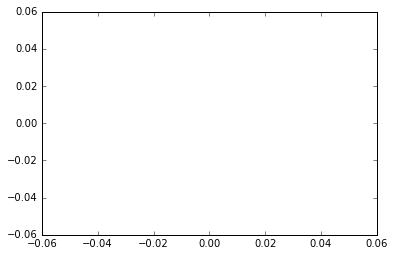

In [7]:
plt.plot();

If we draw a number of lines, we can see that the default behavior of matplotlib is to give them different colors:

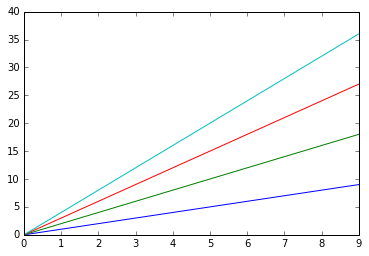

In [8]:
for i in range(1,5):
    plt.plot(np.arange(10), np.arange(10)*i)

---
## Add a custom cycler
Let us add the monochrome cycler as the default `prop_cycle` for the next plot. This plot we will generate using the object approach.
The `subplots` function (notice the *s*) returns a `figure` object and any number of `axes` objects we ask it to. I find this the easiest way to get both of these objects, even for plots with only 1 ax.

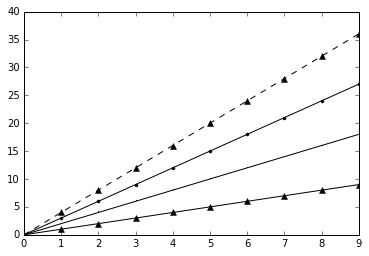

In [9]:
fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)
for i in range(1,5):
    ax.plot(np.arange(10), np.arange(10)*i)

## Set a grid and clear the axis for a prettier plot

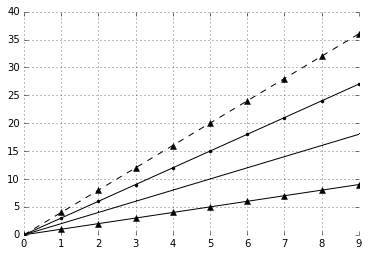

In [10]:
fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)
ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
for i in range(1,5):
    ax.plot(np.arange(10), np.arange(10)*i)

# Override styles for current script

Writing all the `ax.set_grid ...` code for every figure is tedious. We can tell matplotlib to set all new figures with a particular style.

All styles are saved in a dictionary in `plt.rcParams`. We can override its values manually for a single script and will do this now. You can also save your styles manually to a `.mplstyle`-file and load them at will. See [Customizing plots with stylesheets](http://matplotlib.org/users/style_sheets.html).

You can load custom and builtin styles at will using `plt.style.use()` function. You can even load and combine several styles.

Below we will just override entries in the `rcParams` dictionary manually, so that this notebook is not dependent on external files.

In [11]:
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = monochrome
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

# Bar plots

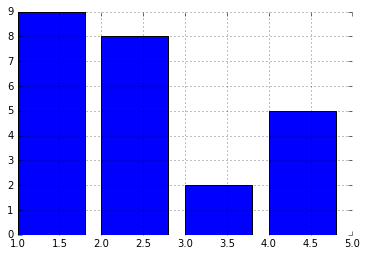

In [12]:
fig, ax = plt.subplots(1,1)

for x in range(1,5):
    ax.bar(x, np.random.randint(2,10))

Now there are 3 problems with this barplot:

1. The bars are colored
2. The bars cannot be distinguished
3. The grid is above the bars (will become a big problem when *1* is solved)

We will color all the bars *white* and leave the black border. To distinguish the bars using only monochrome colors, we will paint them with *hatches* - repeating patterns. To place the bars in front of the grid, we will set their `zorder` to something high.

More on *hatches*:
* [Hatch demo, matplotlib documnetation](http://matplotlib.org/examples/pylab_examples/hatch_demo.html)
* [Combining hatches and changing hatch spacing](http://www.collindelker.com/wp/2013/03/matplotlib-hatch-spacing/)
* [List of all possible hatch patterns](http://matplotlib.org/api/collections_api.html?highlight=set_hatch#matplotlib.collections.Collection.set_hatch)

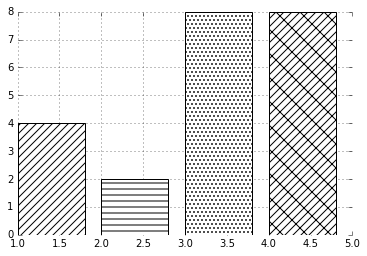

In [13]:
fig, ax = plt.subplots(1,1)

bar_cycle = (cycler('hatch', ['///', '--', '...','\///', 'xxx', '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
styles = bar_cycle()

for x in range(1,5):
    ax.bar(x, np.random.randint(2,10), **next(styles))

# Further reading / sources

* [Matplotlib basic guide](http://matplotlib.org/users/pyplot_tutorial.html). Official tutorial teaching the command style
* [Matplotlib advanced guide](http://matplotlib.org/users/developer.html#advanced-guide). The best introduction to how to use matplotlib via the object oriented interface.
* [Stackoverflow on hatches](http://stackoverflow.com/a/38120100)
* [Documentation for cycler](http://matplotlib.org/cycler/). Has a lot of good examples on how to use cyclers for various kinds of datas. Especially check out how they use `defaultdict` with cyclers to add stylings to groups of arbitrary names.